## <font color='darkblue'>Preface</font>
([source](https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/)) <font size='3ptx'>**Weight initialization is an important design choice when developing deep learning neural network models.**</font>

Historically, weight initialization involved using small random numbers, although over the last decade, more specific heuristics have been developed that use information, such as the type of activation function that is being used and the number of inputs to the node.

**These more tailored heuristics can result in more effective training of neural network models using the stochastic gradient descent optimization algorithm. In this tutorial, you will discover how to implement weight initialization techniques for deep learning neural networks.**

After completing this tutorial, you will know:
* Weight initialization is used to define the initial values for the parameters in neural network models prior to training the models on a dataset.
* How to implement the xavier and normalized xavier weight initialization heuristics used for nodes that use the Sigmoid or Tanh activation functions.
* How to implement the he weight initialization heuristic used for nodes that use the ReLU activation function.

### <font color='darkgreen'>Tutorial Overview</font>
This tutorial is divided into three parts; they are:
* <font size='3ptx'>[**Weight Initialization for Neural Networks**](#sect1)</font>
* <font size='3ptx'>[**Weight Initialization for Sigmoid and Tanh**](#sect2)</font>
    * [Xavier Weight Initialization](#sect2_1)
    * [Normalized Xavier Weight Initialization](#sect2_2)
* <font size='3ptx'>[**Weight Initialization for ReLU**](#sect3)</font>
    * [He Weight Initialization](#sect3_1)

<a id='sect1'></a>
## <font color='darkblue'>Weight Initialization for Neural Networks</font>
**<font color='darkblue'>Weight initialization</font>** is an important consideration in the design of a neural network model. The nodes in neural networks are composed of parameters referred to as weights used to calculate a weighted sum of the inputs.

Neural network models are fit using an optimization algorithm called stochastic gradient descent that incrementally changes the network weights to minimize a loss function, hopefully resulting in a set of weights for the mode that is capable of making useful predictions.

This optimization algorithm requires a starting point in the space of possible weight values from which to begin the optimization process. **Weight initialization is a procedure to set the weights of a neural network to small random values that define the starting point for the optimization** (<font color='brown'>learning or training</font>) **of the neural network model**.
> … training deep models is a sufficiently difficult task that most algorithms are strongly affected by the choice of initialization. The initial point can determine whether the algorithm converges at all, with some initial points being so unstable that the algorithm encounters numerical difficulties and fails altogether.<br/><br/>
> [**— Page 301, Deep Learning, 2016.**](https://amzn.to/3qSk3C2)

Each time, a neural network is initialized with a different set of weights, resulting in a different starting point for the optimization process, and potentially resulting in a different final set of weights with different performance characteristics.

For more on the expectation of different results each time the same algorithm is trained on the same dataset, see the tutorial:
* [Why Do I Get Different Results Each Time in Machine Learning?](https://machinelearningmastery.com/different-results-each-time-in-machine-learning/)

**We cannot initialize all weights to the value 0.0 as the optimization algorithm results in some asymmetry in the error gradient to begin searching effectively.** For more on why we initialize neural networks with random weights, see the tutorial:
* [Why Initialize a Neural Network With Random Weights?](https://machinelearningmastery.com/why-initialize-a-neural-network-with-random-weights/)

Historically, weight initialization follows simple heuristics, such as:
* Small random values in the range \[-0.3, 0.3]
* Small random values in the range \[0, 1]
* Small random values in the range \[-1, 1]

These heuristics continue to work well in general.
> We almost always initialize all the weights in the model to values drawn randomly from a Gaussian or uniform distribution. The choice of Gaussian or uniform distribution does not seem to matter very much, but has not been exhaustively studied. The scale of the initial distribution, however, does have a large effect on both the outcome of the optimization procedure and on the ability of the network to generalize.<br/><br/>
> [**— Page 302, Deep Learning, 2016.**](https://amzn.to/3qSk3C2)

Nevertheless, **more tailored approaches have been developed over the last decade that have become the defacto standard given they may result in a slightly more effective optimization** (<font color='brown'>model training</font>) **process**.

These modern weight initialization techniques are divided based on the type of activation function used in the nodes that are being initialized, such as “[**Sigmoid**](https://en.wikipedia.org/wiki/Sigmoid_function) and [**Tanh**](https://en.wikipedia.org/wiki/Hyperbolic_functions)” and “[**ReLU**](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).”

Next, let’s take a closer look at these modern weight initialization heuristics for nodes with Sigmoid and Tanh activation functions.

<a id='sect2'></a>
## <font color='darkblue'>Weight Initialization for Sigmoid and Tanh</font>
The current standard approach for initialization of the weights of neural network layers and nodes that use the Sigmoid or TanH activation function is called “**glorot**” or “**xavier**” initialization.

It is named for [Xavier Glorot](https://www.linkedin.com/in/xglorot/), currently a research scientist at Google DeepMind, and was described in the 2010 paper by Xavier and Yoshua Bengio titled “[**Understanding The Difficulty Of Training Deep Feedforward Neural Networks.**](http://proceedings.mlr.press/v9/glorot10a.html)”

There are two versions of this weight initialization method, which we will refer to as “xavier” and “normalized xavier.”
> Glorot and Bengio proposed to adopt a properly scaled uniform distribution for initialization. This is called “Xavier” initialization \[…] Its derivation is based on the assumption that the activations are linear. This assumption is invalid for ReLU and PReLU. <br/><br/>
> [**— Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification, 2015.**](https://arxiv.org/abs/1502.01852)

**Both approaches were derived assuming that the activation function is linear**, nevertheless, they have become the standard for nonlinear activation functions like Sigmoid and Tanh, but not ReLU.

<a id='sect2_1'></a>
### <font color='darkgreen'>Xavier Weight Initialization</font>
The xavier initialization method is calculated as a random number with a uniform probability distribution (U) between the range `-(1/sqrt(n))` and `1/sqrt(n)`, where `n` is the number of inputs to the node.
* $weight = U [-(1/sqrt(n)), 1/sqrt(n)]$

We can implement this directly in Python.

The example below assumes 10 inputs to a node, then calculates the lower and upper bounds of the range and calculates 1,000 initial weight values that could be used for the nodes in a layer or a network that uses the sigmoid or tanh activation function.

After calculating the weights, the lower and upper bounds are printed as are the min, max, mean, and standard deviation of the generated weights. The complete example is listed below.

In [1]:
# example of the xavier weight initialization
from math import sqrt
from numpy import mean
from numpy.random import rand

# number of nodes in the previous layer
n = 10
# calculate the range for the weights
lower, upper = -(1.0 / sqrt(n)), (1.0 / sqrt(n))

# generate random numbers
numbers = rand(1000)

# scale to the desired range
scaled = lower + numbers * (upper - lower)

# summarize
print(lower, upper)
print(scaled.min(), scaled.max())
print(scaled.mean(), scaled.std())

-0.31622776601683794 0.31622776601683794
-0.31550562952607164 0.3158295818131977
0.0029724367624866604 0.18734252245868385


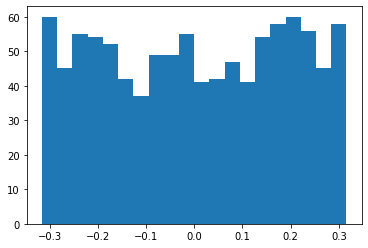

In [5]:
import matplotlib.pyplot as plt

plt.hist(scaled, bins = 20)
plt.show()

Running the example generates the weights and prints the summary statistics. We can see that the bounds of **the weight values are about -0.316 and 0.316.** These bounds would become wider with fewer inputs and more narrow with more inputs.

We can see that the generated weights respect these bounds and that **the mean weight value is close to zero with the standard deviation close to 0.18.**

It can also help to see how the spread of the weights changes with the number of inputs.

For this, we can **calculate the bounds on the weight initialization with different numbers of inputs from 1 to 100 and plot the result.** The complete example is listed below:

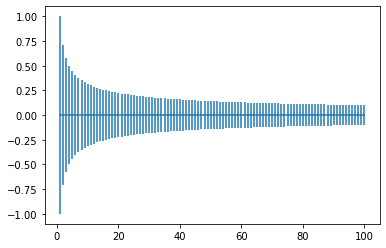

In [6]:
# plot of the bounds on xavier weight initialization for different numbers of inputs
from math import sqrt
from matplotlib import pyplot

# define the number of inputs from 1 to 100
values = [i for i in range(1, 101)]

# calculate the range for each number of inputs
results = [1.0 / sqrt(n) for n in values]

# create an error bar plot centered on 0 for each number of inputs
pyplot.errorbar(values, [0.0 for _ in values], yerr=results)
pyplot.show()

Running the example creates a plot that allows us to compare the range of weights with different numbers of input values. We can see that with **very few inputs, the range is large, such as between -1 and 1 or -0.7 to -7**. We can then see that our range rapidly drops to about 20 weights to near -0.1 and 0.1, where it remains reasonably constant.

<a id='sect2_2'></a>
### <font color='darkgreen'>Normalized Xavier Weight Initialization</font>
The normalized xavier initialization method is calculated as a random number with a uniform probability distribution (U) between the range `-(sqrt(6)/sqrt(n + m))` and `sqrt(6)/sqrt(n + m)`, where `n` us the number of inputs to the node (<font color='brown'>e.g. number of nodes in the previous layer</font>) and `m` is the number of outputs from the layer (<font color='brown'>e.g. number of nodes in the current layer</font>).
* $weight = U [-(sqrt(6)/sqrt(n + m)), sqrt(6)/sqrt(n + m)]$

We can implement this directly in Python as we did in the previous section and summarize the statistical summary of 1,000 generated weights. The complete example is listed below.

In [7]:
# example of the normalized xavier weight initialization
from math import sqrt
from numpy import mean
from numpy.random import rand

# number of nodes in the previous layer
n = 10

# number of nodes in the next layer
m = 20

# calculate the range for the weights
lower, upper = -(sqrt(6.0) / sqrt(n + m)), (sqrt(6.0) / sqrt(n + m))

# generate random numbers
numbers = rand(1000)

# scale to the desired range
scaled = lower + numbers * (upper - lower)

# summarize
print(lower, upper)
print(scaled.min(), scaled.max())
print(scaled.mean(), scaled.std())

-0.44721359549995787 0.44721359549995787
-0.44612061747515624 0.4465036926421888
0.0051130845760912645 0.2542398974273523


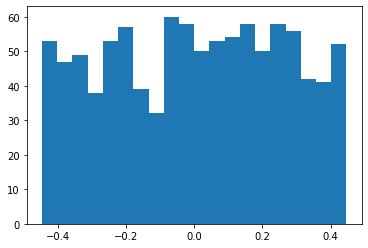

In [8]:
plt.hist(scaled, bins = 20)
plt.show()

Running the example generates the weights and prints the summary statistics.

We can see that the bounds of the weight values are about -0.447 and 0.447. **These bounds would become wider with fewer inputs and more narrow with more inputs.**

**It can also help to see how the spread of the weights changes with the number of inputs.** For this, we can calculate the bounds on the weight initialization with different numbers of inputs from 1 to 100 and a fixed number of 10 outputs and plot the result.

The complete example is listed below.

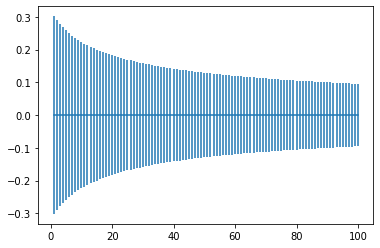

In [9]:
# plot of the bounds of normalized xavier weight initialization for different numbers of inputs
from math import sqrt
from matplotlib import pyplot

# define the number of inputs from 1 to 100
values = [i for i in range(1, 101)]

# define the number of outputs
m = 10

# calculate the range for each number of inputs
results = [1.0 / sqrt(n + m) for n in values]

# create an error bar plot centered on 0 for each number of inputs
pyplot.errorbar(values, [0.0 for _ in values], yerr=results)
pyplot.show()

Running the example creates a plot that allows us to compare the range of weights with different numbers of input values. **Compared to the non-normalized version in the previous section, the range is initially smaller, although transitions to the compact range at a similar rate.**

<a id='sect3'></a>
## <font color='darkblue'>Weight Initialization for ReLU</font>
**The “xavier” weight initialization was found to have problems when used to initialize networks that use the rectified linear** ([ReLU](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)) **activation function**.

As such, a modified version of the approach was developed specifically for nodes and layers that use ReLU activation, popular in the hidden layers of most multilayer Perceptron and convolutional neural network models.

The current standard approach for initialization of the weights of neural network layers and nodes that use the rectified linear (ReLU) activation function is called “**<font color='darkblue'>he</font>**” initialization.

It is named for [Kaiming He](https://www.linkedin.com/in/kaiming-he-90664838/), currently a research scientist at Facebook, and was described in the 2015 paper by Kaiming He, et al. titled “[**Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification.**](https://arxiv.org/abs/1502.01852)”

<a id='sect3_1'></a>
### <font color='darkgreen'>He Weight Initialization</font>
The he initialization method is calculated as a random number with a Gaussian probability distribution (G) with a mean of 0.0 and a standard deviation of `sqrt(2/n)`, where `n` is the number of inputs to the node.
* $weight = G (0.0, sqrt(2/n))$

We can implement this directly in Python.

The example below assumes 10 inputs to a node, then calculates the standard deviation of the Gaussian distribution and calculates 1,000 initial weight values that could be used for the nodes in a layer or a network that uses the ReLU activation function.

After calculating the weights, the calculated standard deviation is printed as are the min, max, mean, and standard deviation of the generated weights. The complete example is listed below.

In [12]:
# example of the he weight initialization
from math import sqrt
from numpy.random import randn

# number of nodes in the previous layer
n = 10

# calculate the range for the weights
std = sqrt(2.0 / n)

# generate random numbers
numbers = randn(1000)

# scale to the desired range
scaled = numbers * std

# summarize
print(f'std={std}')
print(f'scaled with min={scaled.min()}, max={scaled.max()}')
print(f'scaled with mean={scaled.mean()}, std={scaled.std()}')

std=0.4472135954999579
scaled with min=-1.5281244996915078, max=1.4774721631440522
scaled with mean=-0.01845565553195259, std=0.4438195702725045


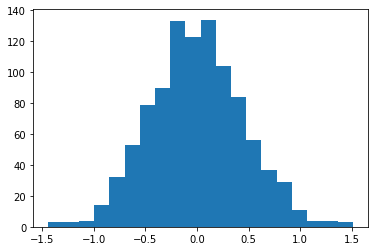

In [11]:
plt.hist(scaled, bins = 20)
plt.show()

We can see that the bound of the calculated standard deviation of the weights is about 0.447. **This standard deviation would become larger with fewer inputs and smaller with more inputs.**

We can see that the range of the weights is about -1.528 to 1.47 which is close to the theoretical range of about -1.788 and 1.788, which is [four times the standard deviation, capturing 99.7% of observations in the Gaussian distribution](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule). We can also see that the mean and standard deviation of the generated weights are close to the prescribed 0.0 and 0.447 respectively.

It can also help to see how the spread of the weights changes with the number of inputs.

For this, we can calculate the bounds on the weight initialization with different numbers of inputs from 1 to 100 and plot the result. The complete example is listed below.

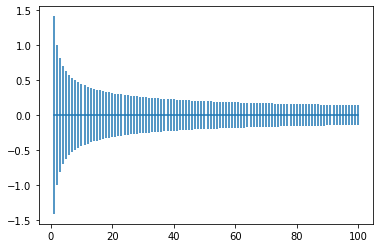

In [14]:
# plot of the bounds on he weight initialization for different numbers of inputs
from math import sqrt
from matplotlib import pyplot

# define the number of inputs from 1 to 100
values = [i for i in range(1, 101)]

# calculate the range for each number of inputs
results = [sqrt(2.0 / n) for n in values]

# create an error bar plot centered on 0 for each number of inputs
pyplot.errorbar(values, [0.0 for _ in values], yerr=results)
pyplot.show()

We can see that with very few inputs, the range is large, near -1.5 and 1.5 or -1.0 to -1.0. We can then see that our range rapidly drops to about 20 weights to near -0.1 and 0.1, where it remains reasonably constant.

## <font color='darkblue'>Summary</font>
In this tutorial, you discovered how to implement weight initialization techniques for deep learning neural networks.

Specifically, you learned:
* Weight initialization is used to define the initial values for the parameters in neural network models prior to training the models on a dataset.
* How to implement the xavier and normalized xavier weight initialization heuristics used for nodes that use the Sigmoid or Tanh activation functions.
* How to implement the he weight initialization heuristic used for nodes that use the ReLU activation function.